# Linear Regression

**What is LinReg?**
- LinReg is a statistical process for estimating the relationships among variables.
     - The predictor is continuous
     - Relationships are between dependent and independent variables (or predictors).
     - Can also be used as a way to infer causal relationships between the dependent and independent variables.
     
**When would we use it?**
- To predict a continuous variable. Example: we want to predcit a stcoks price based on a given set of features or historic labels.

In [26]:
# Comming Soon -  More edu info on OLE to be placed here.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import and make a copy to manipulate
dataset = pd.read_csv('01Students.csv')

df = dataset.copy()

In [4]:
df.head(3)

,Hours,Marks
0,0,34
1,1,36
2,1,33


**Split the data vertically into X and Y.**

In [5]:
X = df.iloc[:, :-1]

Y = df.iloc[:, -1]

**Split the dataset by rows into the training and test datasets.**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Note: we add the X and Y vars created above, inside the parentheses and make the test set at 30%.
# We want to use 70% to train the model. The accuracy is tested with the test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

**All data sets created in the above cell are available if we choose to see them.**

In [9]:
# example
#X_train.head()
y_test.head()

7     45
10    56
4     42
1     36
28    82
Name: Marks, dtype: int64

## Create and train the simple Linear Regression Model.

In [10]:
from sklearn.linear_model import LinearRegression

**Create the regressor.**
- This is an instance of the LinearRegression clas imported above.

In [11]:
std_reg = LinearRegression()

**Train the above regressor on the data that was preprocessed above.**
- We are going to train and fit the data.

In [12]:
std_reg.fit(X_train, y_train)

LinearRegression()

**Now that the data has been trained, lets predict the values of Y from the test data!**

In [13]:
y_predict = std_reg.predict(X_test)

In [14]:
y_predict

array([49.35373808, 49.35373808, 39.29954842, 39.29954842, 84.54340191,
       49.35373808, 39.29954842, 74.48921224, 59.40792775])

## How do we know if our model is any good?

**The coefficient of determination aka the R Squared!**
- It tells us how much variation in Y is explained by variation in X.
- R^2 is the SSR/SST and is a decimal between 0 and 1, the higher the value, the more confident in the explantion of any variance in Y being explained by X.

**Calculate the r^2 and the equation of the line.**

In [15]:
slr_score = std_reg.score(X_test, y_test)

In [17]:
print(f'The R^2 is: {slr_score}')

The R^2 is: 0.8445283770796628


**Given the R^2 is closer to 1, the model is predciting rather well!**

Now get the coefficient.

In [18]:
slr_coefficient = std_reg.coef_

# get the intercept also
slr_intercept = std_reg.intercept_

In [36]:
print(f'The R^2 is: {slr_score}')
print(f'The coefficient is: {slr_coefficient}')
print(f'The intercept is: {slr_intercept}')

The R^2 is: 0.8445283770796628
The coefficient is: [5.02709483]
The intercept is: 34.272453587556456


**Calculate the RMSE - Root Mean Squared Error**
- Provides the actual quantity of error in the predcition

In [22]:
from sklearn.metrics  import mean_absolute_error
import math 

In [24]:
slr_rmse = math.sqrt(mean_absolute_error(y_test, y_predict))

In [25]:
print(F'RMSE is : {slr_rmse}')

RMSE is : 2.3709368109318465


## Plot the Result

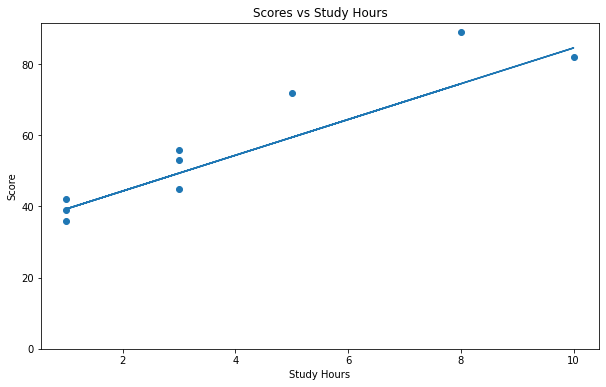

In [32]:
plt.figure(figsize=(10,6))

# view a scatter
plt.scatter(X_test, y_test)

# Trendline
plt.plot(X_test, y_predict)
plt.ylim(ymin=0)

# labels
plt.title('Scores vs Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

In [37]:
print(f'Equation of the regression line is: y = {slr_intercept} + ({slr_coefficient} * x)')

print(f'Example of the regression equation in practice using 6 hours of study to predict the score: 34.27 + (5.03 * 6) = 64.45')

Equation of the regression line is: y = 34.272453587556456 + ([5.02709483] * x)
Example of the regression equation in practice using 6 hours of study ot predci the score: 34.27 + (5.03 * 6) = 64.45


**The results are fairly accurate!**